# 4. 主成分分析

本書は、機械学習レポートの、主成分分析についてです。


## 1.1. 要点まとめ


### 考え方と数式

PCA では、分散が最大になるように、次元を圧縮する。

目的関数は、以下。

$$
Var(\boldsymbol{s}_j) = \boldsymbol{a}_j^T Var( \overline{X})\boldsymbol{a}_j
$$


### ラグランジュ未定乗数法

目的関数の制約条件付き最適解を求める。

$$
arg max_{\boldsymbol{a} \in \mathbb{R}}
\boldsymbol{a}_j^T Var( \overline{X})\boldsymbol{a}_j
$$

制約条件は、

$$
\boldsymbol{a}_j^T \boldsymbol{a} = 1
$$

- NOTE: 制約条件の設定理由
  - [参考: 機械学習のエッセンス　実装しながら学ぶPython、数学、アルゴリズム | 加藤 公一](https://www.amazon.co.jp/dp/B07GYS3RG7/ref=dp-kindle-redirect?_encoding=UTF8&btkr=1)<br>
  > 射影先のベクトルの大きさには意味がないので、 $ \Vert \boldsymbol{w_1} \Vert = 1 $

以下のラグランジュ関数を最大にする係数ベクトルを求める。

$$
E(\boldsymbol{a}_j) = \boldsymbol{a}_j^T Var( \overline{X})\boldsymbol{a}_j
-
\lambda_j(\boldsymbol{a}_j^T \boldsymbol{a} - 1)
$$


最大となるのは、傾きが 0 になる点だから、微分して、

$$
\frac{\partial E(\boldsymbol{a}_1)}
{\partial \boldsymbol{a}_j}
=
2 Var(\overline{X}) \boldsymbol{a}_j - 2 \lambda \boldsymbol{a}_j = 0 \\
\to
2 Var(\overline{X}) \boldsymbol{a}_j = \lambda \boldsymbol{a}_j
$$

射影先の分散は固有値と一致する。(特徴量の分散を維持できる)

$$
Var (\boldsymbol{s_1}) = \boldsymbol{a}_1^T Var( \overline{X})\boldsymbol{a}_1
=
\lambda_1 \boldsymbol{a}_1^T \boldsymbol{a}_1 = \lambda_1
$$


### 寄与率

どこまで採用すると効果的となるかの尺度。

主成分の総分散を以下とすると、

$$
V_{total} = \sum_{i=1}^m \lambda_i
$$

累積率は、

$$
c_k = \frac{\lambda_k}
{\sum_{i=1}^m \lambda_i}
$$

累積寄与率は、

$$
\gamma_k = \frac
{\sum_{j=1}^k \lambda_j}
{\sum_{i=1}^m \lambda_i}
$$


## 1.2. 実装演習


### np_pca.ipynb


#### キャプチャ

自身の環境において、最終コードセルまでの実行を確認した。


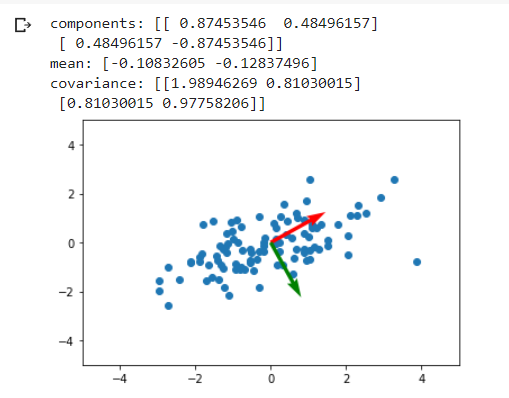

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


##### 学習

コードセル[4]について、以下を確認した。

```
    mean = X.mean(axis=0)
```
中心から線を引かれる部分の実装。

- 参考: [主成分分析 - Wikipedia](https://ja.wikipedia.org/wiki/%E4%B8%BB%E6%88%90%E5%88%86%E5%88%86%E6%9E%90)

`stan_cov` は、`numpy.linalg.eigh` の入力にするもの。

- https://numpy.org/doc/stable/reference/generated/numpy.linalg.eigh.html<br>
> Return the eigenvalues and eigenvectors of a complex Hermitian (conjugate symmetric) or a real symmetric matrix.

対称行列の固有値と固有ベクトルを返すから、これらが固有値分解のこと。
よって、 `stan_cov' が不偏共分散行列。

`get_components` 関数が主成分分析の principal component を作成する部分。
固有値の解が複数存在し、その大きい順に取得できる。
固有値の解の数に決まりは、対角要素の個数。今回は 2 個。(次元削減するのは、個々から。解の個数が減るわけではない)


##### 変換 ( 射影 )

新たな軸でグラフが描画される。


##### 逆変換

逆変換の数式を確認した。

$$
X = [\boldsymbol{x}_{1}, \boldsymbol{x}_{2}, ..., \boldsymbol{x}_{n}]^{\mathrm{T}} \\
W=[\boldsymbol{w}_{1}, \boldsymbol{w}_{2}, \cdots, \boldsymbol{w}_{m}] \\
Z = X^{\mathrm{T}}W
$$


$$
Z = [\boldsymbol{z}_{1}, \boldsymbol{z}_{2}, ..., \boldsymbol{z}_{n}]^{\mathrm{T}}
$$

とすると、逆変換は、

$$
\bar{X} = ZW^{\mathrm{T}}
$$


$$
=
\begin{bmatrix}
\boldsymbol{z}_{1} \\
\boldsymbol{z}_{2} \\
\cdots \\
\boldsymbol{z}_{n}
\end{bmatrix}
[\boldsymbol{w}_{1}, \boldsymbol{w}_{2}, \cdots, \boldsymbol{w}_{m}]^T
$$


今回の例では、以下の理解。

写像された2次元ベクトルを以下とすると、

$$
\boldsymbol{z}_{n} = \begin{bmatrix}
x_n && y_n
\end{bmatrix}
$$

以下の様に展開、

$$
\bar{X} =
\begin{pmatrix}
x_1 && y_1 \\
\cdots \\
x_{100} && y_{100}
\end{pmatrix}
\begin{pmatrix}
w_{11} && w_{12} \\
w_{21} && w_{22} \\
\end{pmatrix}
$$

実装では、 $ W $ は、 `components` のこと。


### skl_pca.ipynb


#### キャプチャ

自身の環境において、最終コードセルまでの実行を確認した。


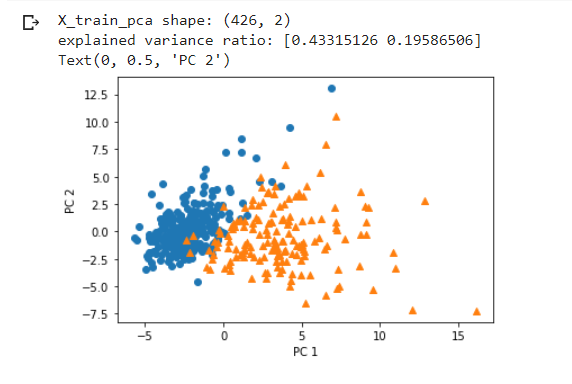

#### 内容

実装演習の際、調べた内容についてのノートを記録する。


最後の、"次元数2まで圧縮"のセルの寄与率おいて、<br>
コードセル[11] の次元削減していない特徴量の 1位、 2位と変わらない、<br>
2つの特徴量を抽出できたことを確認した。
